In [37]:
import pandas as pd
import seaborn as sns

from math import floor
from copy import deepcopy

import random

In [38]:
from google.colab import drive
drive.mount('/content/drive')
base = 'drive/MyDrive/data/sirius'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
# Настройка более красивого отображения графиков с помощью seaborn.
sns.set(rc={'figure.figsize': (11.7, 8.27)})


In [40]:
def custom_compare(x, y):
    if str(x) != str(y):
        raise RuntimeError(f'Ожидаемое значение: {y}. Фактическое: {x}')

In [41]:
class ShuffleOnceRandom():
    """
    Генератор случайных чисел, который запрещает использовать
    функцию shuffle больше одного раза.
    """

    def __init__(self, seed=None):
        import random

        self._random_gen = random.Random(seed)
        self._shuffle_cnt = 0

    def shuffle(self, l):
        if self._shuffle_cnt > 0:
            raise RuntimeError('Нельзя использовать функцию shuffle больше одного раза')

        self._shuffle_cnt += 1
        self._random_gen.shuffle(l)

In [42]:
class ShuffleNRandom():
    """
    Генератор случайных чисел, который запрещает использовать
    функцию shuffle больше n раз.
    """

    def __init__(self, n, seed=None):
        import random

        self._n = n
        self._random_gen = random.Random(seed)
        self._shuffle_cnt = 0

    def shuffle(self, l):
        if self._shuffle_cnt > self._n:
            raise RuntimeError('Нельзя использовать функцию shuffle больше одного раза')

        self._shuffle_cnt += 1
        self._random_gen.shuffle(l)

# Лекция 3. Как разбить пользователей на группы

## Задание 1

In [43]:
def split_solution(data,
                   frac,
                   random_gen):
    """
    Разбивает переданный список объектов на две выборки.

    Аргументы:
        data: список объектов, который нужно разделить на выборки.
        frac: доля объектов, которые нужно отправить в первую выборку.
        random_gen: генератор случайных чисел.

    Возвращаемое значение:
        Пара списков: первая выборка, вторая выборка.
    """
    data_copy = deepcopy(data)
    random_gen.shuffle(data_copy)
    frac_count = floor(frac * len(data_copy))
    return data_copy[:frac_count], data_copy[frac_count:]

In [44]:
def split_tests():
    example_1_data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    example_1_frac = 0.7
    example_1_random_gen = ShuffleOnceRandom(0)

    example_1_res = [8, 9, 2, 6, 4, 5, 3], [1, 10, 7]

    custom_compare(split_solution(example_1_data,
                                  example_1_frac,
                                  example_1_random_gen),
                   example_1_res)


    example_2_data = [i % 5 for i in range(100)]
    example_2_frac = 0.9
    example_2_random_gen = ShuffleOnceRandom(0)

    example_2_res = [3, 3, 1, 2, 3, 3, 1, 1, 4, 4, 1, 3, 2, 1, 0, 2, 2, 2, 3, 1, 4, 1, 4, 0, 4, 0, 2, 4, 3, 2, 3, 1, 3, 4, 1, 3, 4, 3, 4, 4, 4, 0, 4, 0, 0, 1, 1, 1, 2, 2, 3, 0, 4, 0, 3, 1, 1, 0, 2, 0, 3, 2, 3, 0, 1, 0, 1, 0, 0, 4, 0, 1, 0, 2, 4, 2, 4, 3, 2, 3, 2, 4, 2, 0, 1, 2, 4, 2, 4, 0], [1, 3, 1, 2, 0, 3, 0, 3, 2, 4]

    custom_compare(split_solution(example_2_data,
                                  example_2_frac,
                                  example_2_random_gen),
                   example_2_res)

    print('Все тесты прошли успешно!')

In [45]:
split_tests()

Все тесты прошли успешно!


# Лекция 4. Элементы математической статистики

In [46]:
general_vals = pd.read_csv(base + '/general_vals.csv')

## Задание 1

Постройте график распределения значений из колонки `metric` и вычислите среднее значение в колонке.

metric   -0.01712
dtype: float64


<Axes: xlabel='metric', ylabel='Count'>

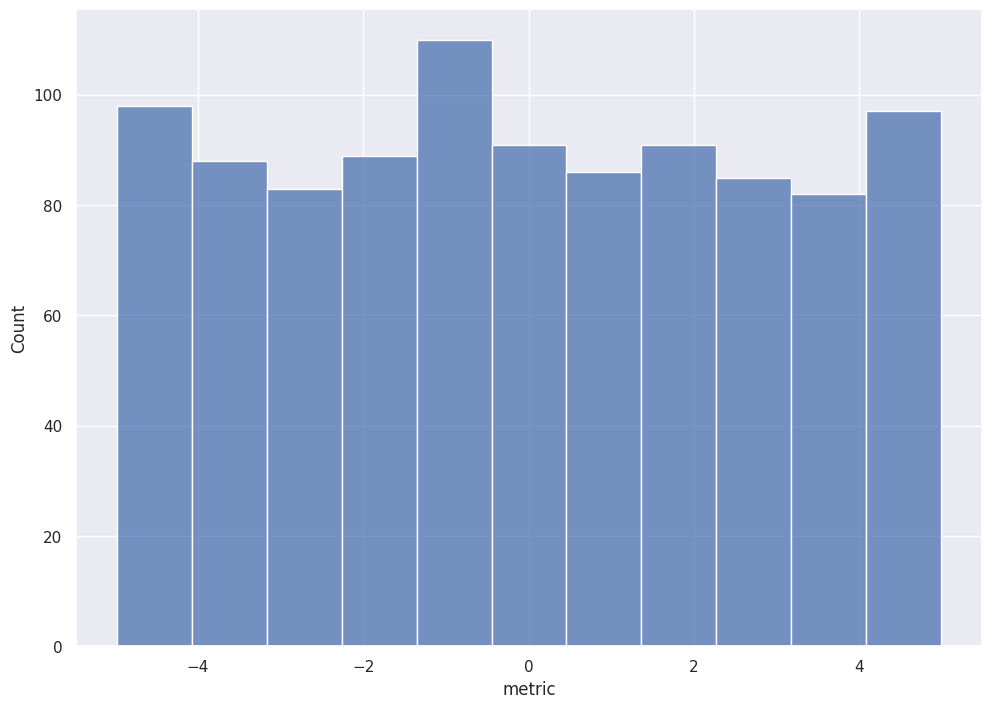

In [47]:
print(general_vals.mean())
sns.histplot(general_vals['metric'])

## Задание 2

Будем рассматривать значения из колонки `metric` как некоторую генеральную совокупность.

Используя реализованную в рамках предыдущих заданий модуля функцию `split_solution`, создайте случайную выборку, размер которой равен `0.03` от размера всей генеральной совокупности. Для этого воспользуйтесь данным в блокноте генератором случайных чисел `task_2_random_gen`. В качестве искомой выборки возьмите первую выборку из результата работы функции `split_solution`.

Вычислите разность выборочного среднего и среднего в генеральной совокупности. В качестве ответа укажите модуль этой разности, округлённый до двух знаков после запятой. В процессе вычисления средние не округляйте.

**Рекомендации по решению**

Важно: значения из генеральной совокупности удобно поместить из колонки в список. Сделать это можно с помощью функции `list`:
```
metric_l = list(general_vals.metric)
```

In [57]:
task_2_random_gen = ShuffleOnceRandom(0)
metric_l = list(general_vals['metric'])
metric_sample = split_solution(metric_l, 0.03, task_2_random_gen)[0]
abs((sum(metric_l) / len(metric_l)) - (sum(metric_sample) / len(metric_sample)))

0.09745333333333336

## Задание 3

Сгенерируйте $1000$ случайных выборок из генеральной совокупности, каждая выборка размером $0.03$ от размера генеральной совокупности, воспользовавшись заготовкой ниже.

Постройте график распределения выборочных средних и вычислите разность двух величин: среднего полученного распределения выборочных средних и среднего генеральной совокупности.

In [86]:
N = 1000
frac = 0.03

In [87]:
task_3_random_gen = ShuffleNRandom(N, seed=1)

In [88]:
random_samples = []

for i in range(N):
    random_sample, _ = split_solution(metric_l, frac, task_3_random_gen)
    random_samples.append(random_sample)

0.004436333333333303


<Axes: ylabel='Count'>

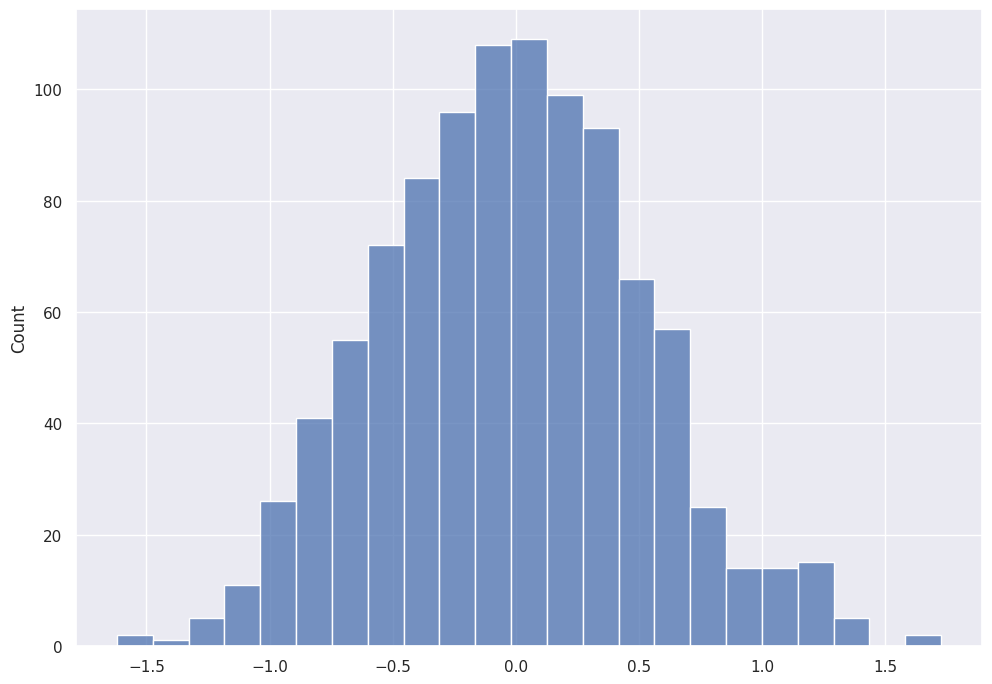

In [89]:
random_samples_means = list(map(lambda sample: sum(sample) / len(sample), random_samples))
print(abs((sum(random_samples_means) / len(random_samples_means)) - (sum(metric_l) / len(metric_l))))
sns.histplot(random_samples_means)

# Лекция 7. Статистическая проверка гипотез на практике

In [ ]:
!pip3 install scipy

In [ ]:
ab_data = pd.read_csv('ab_data.csv')

## Задание 1

Как вы узнали из лекции, одно из условий использования t-теста — дисперсии в сравниваемых группах должны быть равны. Проверить равенство дисперсий в генеральных совокупностях, соответствующих конкретным выборкам, можно с помощью отдельного статистического теста — теста Левена, который проверяет нулевую гипотезу о равенстве дисперсий в двух распределениях.

Проверьте гипотезу о равенстве дисперсий в контрольной и экспериментальной группах. Для этого импортируйте из библиотеки `scipy` тест Левена:
```
from scipy.stats import levene
```

После этого запустите функцию `levene`, передав в качестве её первого аргумента список значений метрики из выборки, соответствующей контрольной группе, а в качестве второго аргумента — список значений метрики из выборки, соответствующей экспериментальной группе.

В результате работы функция вернёт пару чисел: значение статистики теста, рассчитанной для наших данных, а также значение p-value для наших данных.

In [ ]:
from scipy.stats import levene

## Задание 2

Теперь можно перейти к сравнению средних значений метрики в двух группах с помощью t-теста.

Чтобы импортировать его из библиотеки `scipy`, воспользуйтесь следующим кодом:
```
from scipy.stats import ttest_ind
```

Аналогично функции `levene` функция `ttest_ind` принимает на вход списки значений метрики для двух выборок, а возвращает пару значений — статистику теста и значение p-value.

У функции `ttest_ind` есть дополнительный аргумент `equal_var`, который по умолчанию равен `True`. Этот аргумент отвечает за то, будет ли при сравнении двух выборок использоваться t-тест Уэлча, учитывающий возможную разницу между дисперсиями распределений. В случае, если значение `equal_var = True`, используют обычный вариант t-теста, в случае, если значение равно `False`, используют t-тест Уэлча.

В рамках задания установите параметр `equal_var = False` в случае, если тест Левена в предыдущем задании позволил вам отклонить нулевую гипотезу о равенстве дисперсий на заданном уровне значимости $\alpha = 0.01$.

In [ ]:
from scipy.stats import ttest_ind